In [1]:
import splitfolders  # or import split_folders

splitfolders.ratio("C://Users/saran/OneDrive/Documents/CAPSTONE/daata", output="C://Users/saran/OneDrive/Documents/CAPSTONE/split_main", seed=1337, ratio=(.7,.3), group_prefix=None)

Copying files: 3063 files [00:15, 202.63 files/s]


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,LayerNormalization,BatchNormalization,Conv2D,MaxPool2D,Dropout,AveragePooling2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
#import shutil
#import random
#import glob
import matplotlib.pyplot as plt
import numpy as np
import warnings
import cv2
warnings.simplefilter(action='ignore', category=FutureWarning)
from keras.preprocessing.image import ImageDataGenerator

In [26]:
train_path='C://Users/saran/OneDrive/Documents/CAPSTONE/split_main/train'
test_path='C://Users/saran/OneDrive/Documents/CAPSTONE/split_main/test'

In [27]:
cat=[]
for i in range(1,241):
    cat.append(str(i))
    
cate=[]
for i in cat:
    path = train_path+'/'+i
    dir = os.listdir(path)
    if len(dir) == 0:
        cate.append(i)
print(cate)

[]


In [28]:
def to_grayscale_then_rgb(image):
    image=tf.keras.applications.vgg16.preprocess_input(image)
    image = tf.image.rgb_to_grayscale(image)
    return image

train_batches=ImageDataGenerator(preprocessing_function=to_grayscale_then_rgb).flow_from_directory(directory=train_path,target_size=(32,32),classes=cat,batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=to_grayscale_then_rgb) \
    .flow_from_directory(directory=test_path,target_size=(32,32),classes=cat, batch_size=10,shuffle=False)

Found 3243 images belonging to 240 classes.
Found 1109 images belonging to 240 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

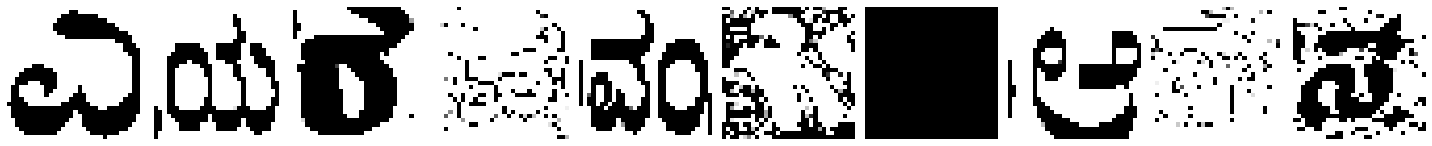

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10, 32, 32, 3)
(10, 240)


In [29]:
imgs,labels = next(train_batches)
def plotImages(images_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()
plotImages(imgs)
print(labels)
print(imgs.shape)
print(labels.shape)

In [30]:
model = Sequential()
model.add(Conv2D(filters=52, kernel_size=(5, 5), input_shape=(32,32,3), activation='tanh'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(LayerNormalization(axis=3 , center=True , scale=True))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='tanh'))
model.add(MaxPool2D(pool_size=(5, 5), strides=(5, 5)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(240, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), metrics=['accuracy'])


In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 52)        3952      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 52)        0         
_________________________________________________________________
layer_normalization_3 (Layer (None, 14, 14, 52)        104       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        83264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [32]:
model.fit(x=train_batches,epochs=200,verbose=1)

Epoch 1/200
325/325 [==============================] - 14s 42ms/step - loss: 5.6233 - accuracy: 0.0256
Epoch 2/200
325/325 [==============================] - 14s 42ms/step - loss: 5.3244 - accuracy: 0.0299
Epoch 3/200
325/325 [==============================] - 14s 43ms/step - loss: 5.1157 - accuracy: 0.0487
Epoch 4/200
325/325 [==============================] - 14s 43ms/step - loss: 4.8502 - accuracy: 0.0789
Epoch 5/200
325/325 [==============================] - 13s 39ms/step - loss: 4.4353 - accuracy: 0.1264
Epoch 6/200
325/325 [==============================] - 14s 43ms/step - loss: 3.8388 - accuracy: 0.2075
Epoch 7/200
325/325 [==============================] - 14s 42ms/step - loss: 3.3165 - accuracy: 0.2960
Epoch 8/200
325/325 [==============================] - 14s 42ms/step - loss: 2.8853 - accuracy: 0.3580
Epoch 9/200
325/325 [==============================] - 13s 40ms/step - loss: 2.5723 - accuracy: 0.4172
Epoch 10/200
325/325 [==============================] - 15s 45ms/step - l

Epoch 156/200
325/325 [==============================] - 13s 41ms/step - loss: 0.3653 - accuracy: 0.8871
Epoch 157/200
325/325 [==============================] - 14s 43ms/step - loss: 0.3610 - accuracy: 0.8862
Epoch 158/200
325/325 [==============================] - 14s 44ms/step - loss: 0.3694 - accuracy: 0.8871
Epoch 159/200
325/325 [==============================] - 14s 43ms/step - loss: 0.3587 - accuracy: 0.8915
Epoch 160/200
325/325 [==============================] - 15s 47ms/step - loss: 0.3252 - accuracy: 0.8915
Epoch 161/200
325/325 [==============================] - 14s 42ms/step - loss: 0.3365 - accuracy: 0.8976
Epoch 162/200
325/325 [==============================] - 15s 45ms/step - loss: 0.3489 - accuracy: 0.8915
Epoch 163/200
325/325 [==============================] - 13s 40ms/step - loss: 0.3908 - accuracy: 0.8807
Epoch 164/200
325/325 [==============================] - 12s 38ms/step - loss: 0.4228 - accuracy: 0.8730
Epoch 165/200
325/325 [==============================] 

In [33]:
model.evaluate(x=test_batches,verbose=1)

111/111 [==============================] - 4s 31ms/step - loss: 0.0356 - accuracy: 0.9883


[0.035623855888843536, 0.9882777333259583]

In [34]:
model.save('model_seq1.h5')

In [103]:
import cv2
import numpy as np
img = cv2.imread('C://Users/saran/OneDrive/Documents/CAPSTONE/split_main/1.jpeg')
img = cv2.resize(img,(32,32))
print(img.shape)
pred=new_model.predict(img[None])
pred1 = pred.argmax(axis=1)
print(pred1)

(32, 32, 3)
[1]
